## Analysis of major and minor grooves

* This tutorial discuss the analyses that can be performed using the [dnaMD Python module](http://do-x3dna.readthedocs.io/en/latest/api_summary.html) included in the _do\_x3dna_ package. The tutorial is prepared using [Jupyter Notebook](https://jupyter.org/) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/base_pairs_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* Two following input files are required in this tutorial
    * ``MGroove_cdna.dat`` (``do_x3dna`` output from the trajectory, which contains the DNA bound with the protein)
    * ``MGroove_odna.dat`` (``do_x3dna`` output from the trajectory, which only contains the free DNA)
    
    These two file **should be** present inside tutorial_data of the current/present working directory.
    
    
* The Python APIs **SHOULD BE** only used when ``do_x3dna`` is executed with ``-ref`` option.


* Detailed documentation is provided [here](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html).

### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](http://do-x3dna.readthedocs.io/en/latest/api_summary.html): Python module to analyze DNA/RNA structures from the do_x3dna output files.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dnaMD
%matplotlib inline


### Initializing DNA object and storing data to it

* [DNA object](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA) is initialized by using the total number of base-pairs


* Minor Groove : direct P-P distance

* Minor Grrove Refined : refined P-P distance which take into account the directions of the sugar-phosphate backbones

* Major Groove : direct P-P distance

* Major Grrove Refined : refined P-P distance which take into account the directions of the sugar-phosphate backbones


* The major and minor grooves (direct P-P) cannot be calculated for first and last two base-steps

* The major and minor grooves (refined P-P) cannot be calculated for first and last three base-steps


* These four types of Grooves can be read and stored in DNA object from the input file using function [set_major_minor_groove()](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.set_major_minor_groove).


* To speed up processing and analysis, data can be stored in a HDF5 file by including HDF5 file name as a argument during initialization. Same file can be used to store and retrieve all other parameters.

In [2]:
## Initialization
pdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs DNA bound with the protein
fdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs free DNA

## If HDF5 file is used to store/save data use these:
# pdna = dnaMD.DNA(60, filename='cdna.h5')     #Initialization for 60 base-pairs DNA bound with the protein
# fdna = dnaMD.DNA(60, filename='odna.h5')     #Initialization for 60 base-pairs free DNA

## Loading data from input files in respective DNA object
# Number of major and minor grooves = Number of base-steps - two : 3 to 57
# Number of refined major and minor grooves = Number of base-steps - three : 4 to 56

# "bp_step=[1, 59]" will try to load parameters of 1 to 59 base-steps. 
# If parameter is not available for any specific base-step, loading will be skipped.

# Four parameters are accepted:
# [ 'minor groove, minor groove refined, major groove, major groove refined ]
parameters = [ 'minor groove', 'minor groove refined', 'major groove', 'major groove refined' ]
pdna.set_major_minor_groove('tutorial_data/MGroove_cdna.dat', bp_step=[1, 59], parameters=parameters, step_range=True)
fdna.set_major_minor_groove('tutorial_data/MGroove_odna.dat', bp_step=[1, 59], parameters=parameters, step_range=True)


Reading file : tutorial_data/MGroove_cdna.dat
Reading frame 1000
Finishid reading.... Total number of frame read =  1001

Reading file : tutorial_data/MGroove_odna.dat
Reading frame 1000
Finishid reading.... Total number of frame read =  1001


### Local base-step parameter of a base-pair directly from dictionary

* The ``DNA.data`` is a python dictionary which contains all the data as a Python Dictionary. For a base-step, parameter as a function of time can be directly extracted.


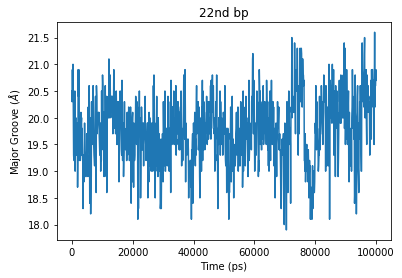

In [3]:
# Extracting "Major Groove" 22nd base-step
maj_groove = pdna.data['bps']['22']['major groove']

# Major Groove vs Time for 22nd base-step
plt.title('22nd bp')
plt.plot(pdna.time, maj_groove)      # index is 2 for 22nd base-step: (20 + 2)
plt.xlabel('Time (ps)')
plt.ylabel('Major Groove ($\AA$)')
plt.show()


### Local major and minor grooves as a function of time (manually)

* A specific local major or minor grooves for the given base-pairs range can be extracted from the DNA obejct using function [dnaMD.DNA.get_parameters(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.get_parameters).


* The extracted parameters of the given base-step can be plotted as a function of time


* The extracted parameters (average) for the DNA segment can be plotted as a function of time


Following example shows **Major Groove** vs **Time** plots. These example also shows that how to extract the parameters value from the DNA object. Other properties could be extracted and plotted using similar steps.  


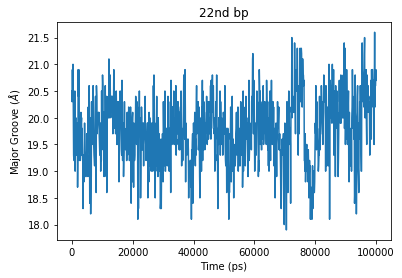

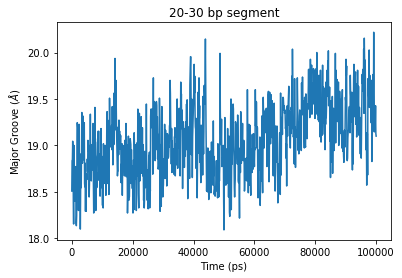

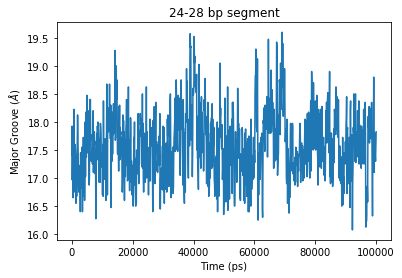

In [4]:
# Extracting "Major Groove" of 20 to 30 base-steps
maj_groove, bp_idx = pdna.get_parameters('major groove',[20,30], bp_range=True)

# Major Groove vs Time for 22nd base-step
plt.title('22nd bp')
plt.plot(pdna.time, maj_groove[2])      # index is 2 for 22nd base-step: (20 + 2)
plt.xlabel('Time (ps)')
plt.ylabel('Major Groove ($\AA$)')
plt.show()

# Average Major Groove vs Time for segment 20-30 base-step
avg_maj_groove = np.mean(maj_groove, axis=0)     # Calculation of mean using mean function of numpy
plt.title('20-30 bp segment')
plt.plot(pdna.time, avg_maj_groove)
plt.xlabel('Time (ps)')
plt.ylabel('Major Groove ($\AA$)')
plt.show()

# Average Major Groove vs Time for segment 24-28 base-step
# index of 24th base-step is 4 (20 + 4). index of 28th base-step is 8 (20 + 8)
avg_maj_groove = np.mean(maj_groove[4:8], axis=0)     
plt.title('24-28 bp segment')
plt.plot(pdna.time, avg_maj_groove)
plt.xlabel('Time (ps)')
plt.ylabel('Major Groove ($\AA$)')
plt.show()

### Local major and minor grooves as a function of time (using provided functions)

Above examples show the method to extract the values from the DNA object. However, [dnaMD.DNA.time_vs_parameter(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.time_vs_parameter) function could be use to get parameter values as a function of time for the given base-pairs/step or segment

---

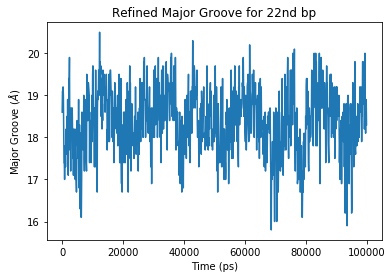

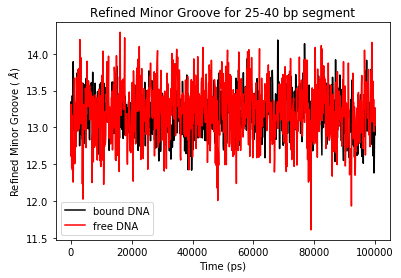

In [5]:
# Refined Major Groove vs Time for 22nd bp
plt.title('Refined Major Groove for 22nd bp')
time, value = pdna.time_vs_parameter('major groove refined', [22])
plt.plot(time, value)
plt.xlabel('Time (ps)')
plt.ylabel('Major Groove ($\AA$)')
plt.show()

# Refined Minor Groove vs Time for 25-40 bp segment
plt.title('Refined Minor Groove for 25-40 bp segment')
# Bound DNA
# Here, Refined Minor Groove for a given segment is conisederd as average over the base-steps
time, value = pdna.time_vs_parameter('minor groove refined', [25, 40], merge=True, merge_method='mean')
plt.plot(time, value, label='bound DNA', c='k')     # balck color => bound DNA
# Free DNA
time, value = fdna.time_vs_parameter('minor groove refined', [25, 40], merge=True, merge_method='mean')
plt.plot(time, value, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Time (ps)')
plt.ylabel('Refined Minor Groove ( $\AA$)')
plt.legend()
plt.show()

### Distribution of major and minor grooves during MD simulations

* As shown in above plot of Time vs Refined Minor Groove, comparison between bound and free DNA is very difficult. Therefore, to compare the parameters of either different DNAs or same DNAs in different environment or different segment of same DNAs, the distribution of parameters over the MD trajectory are sometime useful.


* The distribution could be calculated using the function [dnaMD.DNA.parameter_distribution(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.parameter_distribution) as shown in the following examples.


* The normalized distribution is calculated using [numpy.histogram(...)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html).


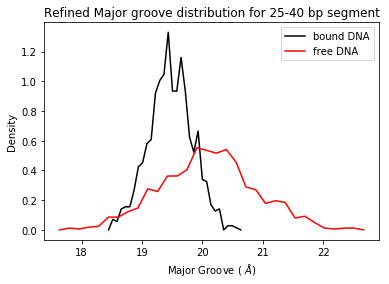

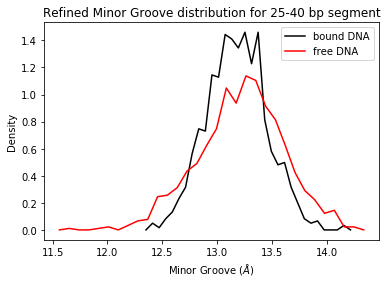

In [6]:
#### Refined Major groove distribution for 25-40 bp segment
plt.title('Refined Major groove distribution for 25-40 bp segment')

### Bound DNA ###

## calculation of parameter distribution for the segment
values, density = pdna.parameter_distribution('major groove refined', [25, 40], bins=30, 
                                              merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='bound DNA', c='k')     # balck color => bound DNA

### Free DNA ###

## calculation of parameter distribution for the segment
values, density = fdna.parameter_distribution('major groove refined', [25, 45], bins=30, 
                                              merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Major Groove ( $\AA$)')
plt.ylabel('Density')
plt.legend()
plt.show()


#### Refined Minor Groove distribution for 25-40 bp segment
plt.title('Refined Minor Groove distribution for 25-40 bp segment')

### Bound DNA ###

## calculation of parameter distribution for the segment
values, density = pdna.parameter_distribution('minor groove refined', [25, 40], bins=30, 
                                              merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='bound DNA', c='k')     # balck color => bound DNA

### Free DNA ###

## calculation of parameter distribution for the segment
values, density = fdna.parameter_distribution('minor groove refined', [25, 40], bins=30, 
                                              merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Minor Groove ($\AA$)')
plt.ylabel('Density')
plt.legend()
plt.show()

### Major and Minor grooves as a function of base-steps

* What is the average values of a given parameter for either each step or a DNA segment?


* To address this question, average values of a given parameter with its error could be calculated for either each base-step or a DNA segment using a function [dnaMD.DNA.get_mean_error(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.get_mean_error).


* This average values could be also use to compare two DNA.


* Standard error could be calculated using block averaging method as derived in this [publication](http://scitation.aip.org/content/aip/journal/jcp/116/1/10.1063/1.1421362). To use this method, [g_analyze](http://manual.gromacs.org/programs/gmx-analyze.html) of GROMACS package should be present in ``$PATH`` environment variable.

---


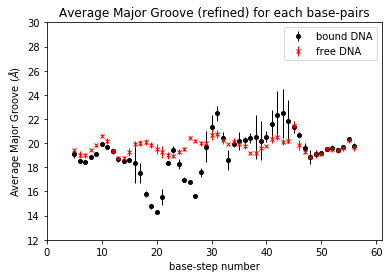

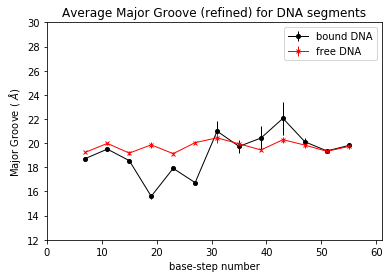

In [7]:
######## Average Major Groove (Refined) as a function of base-steps ########

plt.title('Average Major Groove (refined) for each base-pairs')

### Calculating Average Major Groove for 5 to 56 base-steps DNA bound with protein
bp, values, error = pdna.get_mean_error([5, 56], 'major groove refined', err_type='block', bp_range=True)

# plot these values
plt.errorbar(bp, values, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', 
             mfc='k', mew=1, ms=4, label='bound DNA' )

### Calculating Average Major Groove for 5 to 56 base-steps DNA (without protein)
bp, values, error = fdna.get_mean_error([5, 56], 'major groove refined', err_type='block', bp_range=True)

# plot these values
plt.errorbar(bp, values, yerr=error, ecolor='r', elinewidth=1, color='r', lw=0, marker='x', 
             mfc='r', mew=1, ms=4, label='free DNA' )

plt.ylabel('Average Major Groove ($\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.ylim(12, 30)
plt.legend()
plt.show()

######## Average Major Groove (refined) as a function of DNA segments ########

plt.title('Average Major Groove (refined) for DNA segments')

### Calculating Average Major Groove for 5 to 56 base-steps DNA bound with protein
### DNA segments are assumed to made up of 4 base-steps (merge_bp=4)
bp, values, error = pdna.get_mean_error([5,56], 'major groove refined', err_type='block', 
                                        bp_range=True, merge_bp=4, merge_method='mean')

# plot these values
plt.errorbar(bp, values, yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', 
             mfc='k', mew=1, ms=4, label='bound DNA' )

### Calculating Average Major Groove for 5 to 56 base-steps DNA (without protein)
### DNA segments are assumed to made up of 5 base-steps (merge_bp=4)
bp, values, error = fdna.get_mean_error([5,56], 'major groove refined', err_type='block', 
                                        bp_range=True, merge_bp=4, merge_method='mean')

# plot these values
plt.errorbar(bp, values, yerr=error, ecolor='r', elinewidth=1, color='r', lw=1, marker='x', 
             mfc='r', mew=1, ms=4, label='free DNA' )

plt.ylabel('Major Groove ( $\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.ylim(12, 30)
plt.legend()
plt.show()

### Deviation in parameters of bound DNA with respect to free DNA

As discussed in the above section, average parameters with standard error can be calculated for both bound and free DNA. Additionally, deviation in bound DNA with respect to the free DNA could be calculated using function [dnaMD.dev_bps_vs_parameter(...)](http://do-x3dna.readthedocs.io/en/latest/dnaMD_api.html#dnaMD.dnaMD.dev_bps_vs_parameter) as shown in the following example.

---

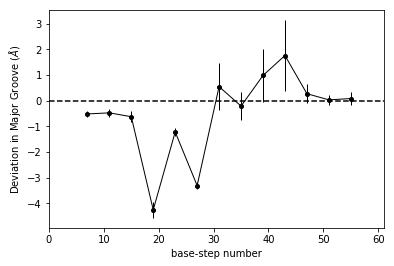

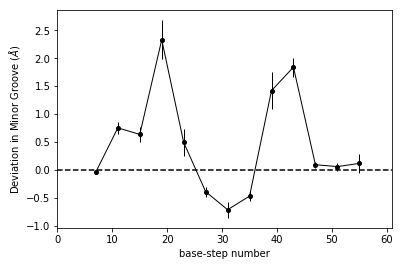

In [8]:
#### Deviation in Major (refined) and Minor (refined) grooves
#### Deviation = Bound DNA(parameter) - Free DNA(parameter) 

### Deviation in Refined Major Groove
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 'major groove refined', 
                                                                err_type='block', bp_range=True, merge_bp=4, 
                                                                merge_method='mean')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', 
             lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Major Groove ($\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.show()

### Deviation in Refined Minor Groove
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 'minor groove refined', 
                                                                err_type='block', bp_range=True, merge_bp=4, 
                                                                merge_method='mean')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', 
             lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Minor Groove ($\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.show()